# Coupled model - Start Date Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import model
import pickle
import itertools
import networkx as nx
from itertools import product
from tqdm import tqdm, tqdm_notebook
%matplotlib inline

In [2]:
pd.Timestamp(2016 - 1, 6, 1) + pd.Timedelta(days=92)

Timestamp('2015-09-01 00:00:00')

### Vaccination program start dates

In [3]:
# Vaccination season start time:  1.7 - 1.12 (15-day jumps)
start_times = [30, 44, 61, 75, 92, 106, 122, 136, 153, 167, 183]

## Load start date analysis results

Basecase - 20% vaccination coverage

In [4]:
# with open('../../data/coupled_model/start_date_analysis/new/start_date_analysis_20per_m100.pickle', 'rb') as pickle_in:
# with open('../../data/coupled_model/start_date_analysis/updated/start_date_analysis_20per_m100.pickle', 'rb') as pickle_in:
with open('../../data/coupled_model/start_date_analysis/updated/start_date_analysis_20per_m100_new.pickle', 'rb') as pickle_in:
    basecase_res_raw = (pickle.load(pickle_in))

basecase_res = {}
for d in basecase_res_raw:
    basecase_res.update(d)

In [5]:
basecase = min(basecase_res.items(), key=lambda x: x[1]['attack_rates']['total'])
basecase_min_attack_rates = {age: basecase[1]['attack_rates'][age] for age in ['children', 'adult_rate', 'total']}
optimal_start_date_basecase = pd.Timestamp(2016 - 1, 6, 1) + pd.Timedelta(days=basecase[0])
print(f'Optimal vaccination season start date: {optimal_start_date_basecase.day}/{optimal_start_date_basecase.month}')
print(f'Minimal attack rate: {basecase_min_attack_rates["total"]*100:.2f}%')
basecase_min_attack_rates

Optimal vaccination season start date: 15/9
Minimal attack rate: 8.08%


{'children': 0.12289752632795707,
 'adult_rate': 0.06322803361441062,
 'total': 0.08078787834923208}

10% vaccination coverage

In [6]:
# with open('../../data/coupled_model/start_date_analysis/new/start_date_analysis_10per_m100.pickle', 'rb') as pickle_in:
with open('../../data/coupled_model/start_date_analysis/updated/start_date_analysis_10per_m100_new.pickle', 'rb') as pickle_in:
    per10_res_raw = (pickle.load(pickle_in))

per10_res = {}
for d in per10_res_raw:
    per10_res.update(d)

In [7]:
per10 = min(per10_res.items(), key=lambda x: x[1]['attack_rates']['total'])
per10_min_attack_rates = {age: per10[1]['attack_rates'][age] for age in ['children', 'adult_rate', 'total']}
optimal_start_date_per10 = pd.Timestamp(2016 - 1, 6, 1) + pd.Timedelta(days=per10[0])
print(f'Optimal vaccination season start date: {optimal_start_date_per10.day}/{optimal_start_date_per10.month}')
print(f'Minimal attack rate: {per10_min_attack_rates["total"]*100:.2f}%')
per10_min_attack_rates

Optimal vaccination season start date: 1/9
Minimal attack rate: 10.20%


{'children': 0.15052685427026918,
 'adult_rate': 0.08171696452928955,
 'total': 0.10196669223976956}

30% vaccination coverage

In [8]:
# with open('../../data/coupled_model/start_date_analysis/new/start_date_analysis_30per_m100.pickle', 'rb') as pickle_in:
with open('../../data/coupled_model/start_date_analysis/updated/start_date_analysis_30per_m100.pickle', 'rb') as pickle_in:
    per30_res_raw = (pickle.load(pickle_in))

per30_res = {}
for d in per30_res_raw:
    per30_res.update(d)

In [9]:
per30 = min(per30_res.items(), key=lambda x: x[1]['attack_rates']['total'])
per30_min_attack_rates = {age: per30[1]['attack_rates'][age] for age in ['children', 'adult_rate', 'total']}
optimal_start_date_per30 = pd.Timestamp(2016 - 1, 6, 1) + pd.Timedelta(days=per30[0])
print(f'Optimal vaccination season start date: {optimal_start_date_per30.day}/{optimal_start_date_per30.month}')
print(f'Minimal attack rate: {per30_min_attack_rates["total"]*100:.2f}%')
per30_min_attack_rates

Optimal vaccination season start date: 1/10
Minimal attack rate: 5.98%


{'children': 0.09264730621098766,
 'adult_rate': 0.046034717934727985,
 'total': 0.05975210978098809}

40% vaccination coverage

In [10]:
# with open('../../data/coupled_model/start_date_analysis/new/start_date_analysis_45per_m100.pickle', 'rb') as pickle_in:
with open('../../data/coupled_model/start_date_analysis/updated/start_date_analysis_45per_m100.pickle', 'rb') as pickle_in:

    per40_res_raw = (pickle.load(pickle_in))

per40_res = {}
for d in per40_res_raw:
    per40_res.update(d)

In [11]:
per40 = min(per40_res.items(), key=lambda x: x[1]['attack_rates']['total'])
per40_min_attack_rates = {age: per40[1]['attack_rates'][age] for age in ['children', 'adult_rate', 'total']}
optimal_start_date_per40 = pd.Timestamp(2016 - 1, 6, 1) + pd.Timedelta(days=per40[0])
print(f'Optimal vaccination season start date: {optimal_start_date_per40.day}/{optimal_start_date_per40.month}')
print(f'Minimal attack rate: {per40_min_attack_rates["total"]*100:.2f}%')
per40_min_attack_rates

Optimal vaccination season start date: 15/10
Minimal attack rate: 4.07%


{'children': 0.06359678506254274,
 'adult_rate': 0.031166904943090563,
 'total': 0.04071053660090036}

### Attack rates by start date and vaccination coverage

In [12]:
a=1
# no_inter_attack_rates = np.array([res['attack_rates']['total'] for res in no_inter_res.values()])
# no_inter_attack_rates_std = np.array([res['attack_rates']['total_std'] for res in no_inter_res.values()])

#### Basecase - 20%
# Get attack rates
basecase_attack_rates = np.array(list(map(lambda x: x[1], sorted([(start_date, res['attack_rates']['total'])
                                                                  for start_date, res in basecase_res.items()], key=lambda x: x[0]))))
basecase_attack_rates_std = np.array(list(map(lambda x: x[1], sorted([(start_date, res['attack_rates']['total_std'])
                                                                      for start_date, res in basecase_res.items()], key=lambda x: x[0]))))
# Confidence interval
basecase_attack_rates_std /= np.sqrt(100*len(model.seasons))
basecase_attack_rates_std *= a 

#### 10% vaccination coverage
# Get attack rates
per10_attack_rates = np.array(list(map(lambda x: x[1], sorted([(start_date, res['attack_rates']['total'])
                                                                  for start_date, res in per10_res.items()], key=lambda x: x[0]))))
per10_attack_rates_std = np.array(list(map(lambda x: x[1], sorted([(start_date, res['attack_rates']['total_std'])
                                                                      for start_date, res in per10_res.items()], key=lambda x: x[0]))))
# Confidence interval
per10_attack_rates_std /= np.sqrt(100*len(model.seasons))
per10_attack_rates_std *= a

#### 30% vaccination coverage
# Get attack rates
per30_attack_rates = np.array(list(map(lambda x: x[1], sorted([(start_date, res['attack_rates']['total'])
                                                                  for start_date, res in per30_res.items()], key=lambda x: x[0]))))
per30_attack_rates_std = np.array(list(map(lambda x: x[1], sorted([(start_date, res['attack_rates']['total_std'])
                                                                      for start_date, res in per30_res.items()], key=lambda x: x[0]))))
# Confidence interval
per30_attack_rates_std /= np.sqrt(100*len(model.seasons))
per30_attack_rates_std *= a

#### 40% vaccination coverage
# Get attack rates
per40_attack_rates = np.array(list(map(lambda x: x[1], sorted([(start_date, res['attack_rates']['total'])
                                                                  for start_date, res in per40_res.items()], key=lambda x: x[0]))))
per40_attack_rates_std = np.array(list(map(lambda x: x[1], sorted([(start_date, res['attack_rates']['total_std'])
                                                                      for start_date, res in per40_res.items()], key=lambda x: x[0]))))
# Confidence interval
per40_attack_rates_std /= np.sqrt(100*len(model.seasons))
per40_attack_rates_std *= a

### Plot

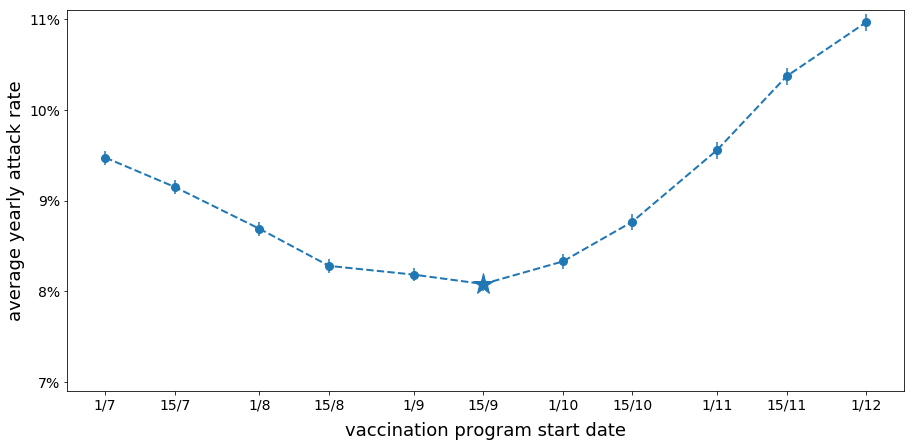

In [13]:
fig = plt.figure(figsize=(15, 7))

attack_rates = [per10_attack_rates, basecase_attack_rates, per30_attack_rates, per40_attack_rates]
attack_rates_std = [per10_attack_rates_std, basecase_attack_rates_std, per30_attack_rates_std, per40_attack_rates_std]
min_attack_rates = [per10_min_attack_rates['total'], basecase_min_attack_rates['total'], per30_min_attack_rates['total'],
                    per40_min_attack_rates['total']] 
optimal_start_dates = [optimal_start_date_per10, optimal_start_date_basecase, optimal_start_date_per30,
                       optimal_start_date_per40]

# Get vaccination program start dates
start_dates = [pd.Timestamp(2016 - 1, 6, 1) + pd.Timedelta(days=x) for x in start_times]


# Plot attack rates
plt.plot(start_dates, basecase_attack_rates, '--o', linewidth=2, markersize=8, color='C0')

# Plot errors
plt.errorbar(start_dates, basecase_attack_rates, yerr=basecase_attack_rates_std, linestyle='None', color='C0')

# Mark minimum
plt.plot(optimal_start_date_basecase, basecase_min_attack_rates['total'], '*', markersize=22, color='C0')

# plt.title('Vaccination Program Start Date', size=20, pad=10)
plt.xlabel('vaccination program start date', size=18, labelpad=10)
plt.ylabel('average yearly attack rate', size=18)

plt.xticks(start_dates, [f'{date.day}/{date.month}' for date in start_dates], size=14)
plt.yticks(np.arange(0.07, 0.111, 0.01), [f'{x*100:.0f}%' for x in np.arange(0.07, 0.111, 0.01)], size=14)
plt.ylim([0.069, 0.111])

# legend = plt.legend(title='approx. vaccination coverage', fontsize=12, loc='lower left')
# plt.setp(legend.get_title(), fontsize=12)


plt.show()

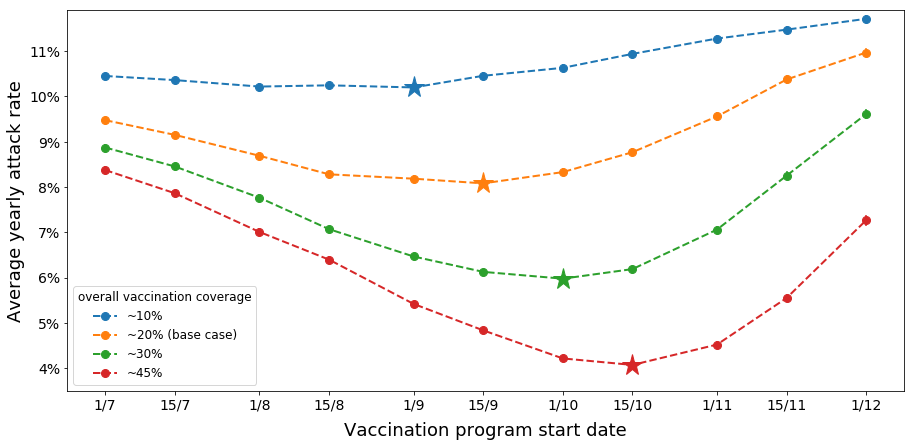

In [14]:
fig = plt.figure(figsize=(15, 7))

attack_rates = [per10_attack_rates, basecase_attack_rates, per30_attack_rates, per40_attack_rates]
attack_rates_std = [per10_attack_rates_std, basecase_attack_rates_std, per30_attack_rates_std, per40_attack_rates_std]
min_attack_rates = [per10_min_attack_rates['total'], basecase_min_attack_rates['total'], per30_min_attack_rates['total'],
                    per40_min_attack_rates['total']] 
optimal_start_dates = [optimal_start_date_per10, optimal_start_date_basecase, optimal_start_date_per30,
                       optimal_start_date_per40]

# Get vaccination program start dates
start_dates = [pd.Timestamp(2016 - 1, 6, 1) + pd.Timedelta(days=x) for x in start_times]

# labels
labels = ['~10%', '~20% (base case)', '~30%', '~45%']

# Colors for plotting
colors = [f'C{i}' for i in range(len(attack_rates))]

for i in range(len(attack_rates)):
    # Plot attack rates
    plt.plot(start_dates, attack_rates[i], '--o', linewidth=2, markersize=8, label=labels[i],
             color=colors[i])

    # Plot errors
    plt.errorbar(start_dates, attack_rates[i], yerr=attack_rates_std[i], linestyle='None',
                 color=colors[i])

    # Mark minimum
    plt.plot(optimal_start_dates[i], min_attack_rates[i], '*', markersize=22,
             color=colors[i])

# plt.title('Vaccination Program Start Date', size=20, pad=10)
plt.xlabel('Vaccination program start date', size=18, labelpad=10)
plt.ylabel('Average yearly attack rate', size=18)

plt.xticks(start_dates, [f'{date.day}/{date.month}' for date in start_dates], size=14)
plt.yticks(np.arange(0.04, 0.111, 0.01), [f'{x*100:.0f}%' for x in np.arange(0.04, 0.111, 0.01)], size=14)
plt.ylim([0.035, 0.119])

legend = plt.legend(title='overall vaccination coverage', fontsize=12, loc='lower left')
plt.setp(legend.get_title(), fontsize=12)


plt.show()

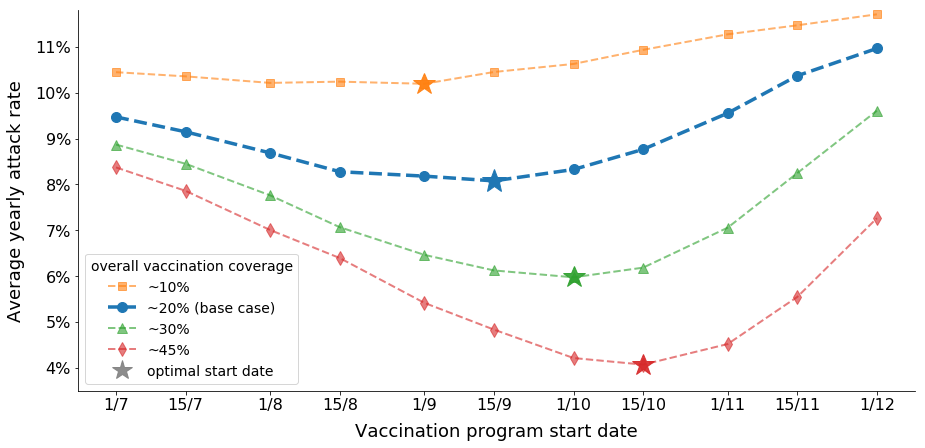

In [17]:
# fig = plt.figure(figsize=(15, 7))
fig, ax = plt.subplots(figsize=(15, 7))


attack_rates = [per10_attack_rates, basecase_attack_rates, per30_attack_rates, per40_attack_rates]
attack_rates_std = [per10_attack_rates_std, basecase_attack_rates_std, per30_attack_rates_std, per40_attack_rates_std]
min_attack_rates = [per10_min_attack_rates['total'], basecase_min_attack_rates['total'], per30_min_attack_rates['total'],
                    per40_min_attack_rates['total']] 
optimal_start_dates = [optimal_start_date_per10, optimal_start_date_basecase, optimal_start_date_per30,
                       optimal_start_date_per40]

# Get vaccination program start dates
start_dates = [pd.Timestamp(2016 - 1, 6, 1) + pd.Timedelta(days=x) for x in start_times]

# labels
labels = ['~10%', '~20% (base case)', '~30%', '~45%']

# Colors for plotting
# colors = [f'C{i}' for i in range(len(attack_rates))]
colors = [f'C{i}' for i in [1,0,2,3]]
# colors = ['gray', 'C0', 'gray', 'gray']
markers = ['s', 'o', '^', 'd']
sizes = [8,10,10,10]


for i in range(len(attack_rates)):
    # Plot attack rates
    plt.plot(start_dates, attack_rates[i], '--o', linewidth=2 if i!=1 else 3.5, markersize=sizes[i], label=labels[i],
             marker=markers[i], color=colors[i], alpha=0.6 if i!=1 else 1)

    # Plot errors
#     plt.errorbar(start_dates, attack_rates[i], yerr=attack_rates_std[i], linestyle='None',color=colors[i],
#                  alpha=0.6 if i!=1 else 1)

    # Mark minimum
    plt.plot(optimal_start_dates[i], min_attack_rates[i], '*', markersize=23 if i!=1 else 25, color=colors[i],
             alpha=0.9 if i!=1 else 1)

# plt.title('Vaccination Program Start Date', size=20, pad=10)
plt.xlabel('Vaccination program start date', size=18, labelpad=10)
plt.ylabel('Average yearly attack rate', size=18, labelpad=10)

plt.xticks(start_dates, [f'{date.day}/{date.month}' for date in start_dates], size=16)
plt.yticks(np.arange(0.04, 0.111, 0.01), [f'{x*100:.0f}%' for x in np.arange(0.04, 0.111, 0.01)], size=16)
plt.ylim([0.035, 0.118])

# Legend
plt.plot(optimal_start_dates[i], 0.13, '*', markersize=20 if i!=1 else 25, color='gray',
         label='optimal start date', alpha=0.9 if i!=1 else 1)
legend = plt.legend(title='overall vaccination coverage', fontsize=14, loc='lower left')
plt.setp(legend.get_title(), fontsize=14)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

Convert to cases

In [ ]:
# Convert to cases
# Total population size (lamas) - in thousends
total_pop_size = 3606696/1000
no_inter_cases = no_inter_attack_rates*total_pop_size
no_inter_cases_std = np.sqrt((total_pop_size**2)*(no_inter_attack_rates_std**2))

# std
no_inter_cases_std /= np.sqrt(50*len(model.seasons))

# Plot cases
fig = plt.figure(figsize=(15, 7))

plt.bar(np.arange(11) ,no_inter_cases, width=0.5, yerr=no_inter_cases_std,
        color=[f'C{i}' for i in range(len(no_inter_attack_rates))])


plt.title('No Intervention - Vaccination Season Start Date', size=20, pad=10)
plt.xlabel('vaccinaiton season start date', size=18, labelpad=10)
plt.ylabel('yearly cases (thousands)', size=18)

start_dates = [pd.Timestamp(2016 - 1, 6, 1) + pd.Timedelta(days=x) for x in start_times_no_inter]
plt.xticks(np.arange(11), [f'{date.day}/{date.month}' for date in start_dates], size=15)
plt.tick_params('y', labelsize=15)

In [ ]:
# Plot attack rates - bar plot
# fig = plt.figure(figsize=(15, 7))

# plt.bar(np.arange(11) ,basecase_attack_rates, width=0.5, yerr=basecase_attack_rates_std),
#         color=[f'C{i}' for i in range(len(no_inter_attack_rates))])


# plt.title('No Intervention - Vaccination Season Start Date', size=20, pad=10)
# plt.xlabel('vaccinaiton season start date', size=18, labelpad=10)
# plt.ylabel('yearly attack rate', size=18)

# start_dates = [pd.Timestamp(2016 - 1, 6, 1) + pd.Timedelta(days=x) for x in start_times_no_inter]
# plt.xticks(np.arange(11), [f'{date.day}/{date.month}' for date in start_dates], size=15)
# plt.tick_params('y', labelsize=15)



# plt.show()